<font color = 'Orange' size = 6> Satellite Dataset-RSI-CB256 trained with ResNet Architecture  -With Hyperparameter Tuning</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import os
helper_methods_folder = '/content/drive/MyDrive/AI Project/Model Training/helper_methods'

sys.path.append(os.path.abspath(helper_methods_folder))

**Importing helper methods for preprocessing, training and plotting**

In [3]:
from preprocessing import load_data
from plots import plot_data_loader, show_examples
from plots import plot_accuracy, plot_loss,plot_training_batch_loss, plot_confusion_matrix
from training import train_model, compute_accuracy_and_loss
from early_stopping import EarlyStopping
from metrics import compute_classification_report, compute_confusion_matrix
from unnormalize_images import UnNormalize
from predictions import predict_image_class

**Importing Libraries**

In [4]:
from torchvision import models
import torch.nn as nn
import torch
import matplotlib.pyplot as plt


In [5]:
root_dir = r'/content/drive/MyDrive/AI Project/Datasets/Satellite Dataset-RSI-CB256/data'
path_to_save_model=r"/content/drive/MyDrive/AI Project/Model Training/Satellite_datatset_weights/"
file_name = "satellite_dataset_RESNEThyperparameter" 

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
print("Device: {}".format(device))

Device: cuda:0


## **Hyperparameter Tuning with Different LR and Optimiser combination**

In [7]:
#grid search
hyper_parameters = {"learning_rate": [0.01, 0.001, 0.0001], "optimizers": ['Adam', 'SGD']}

train_loss_hyper_parameters = {"lr0.01Adam": [], "lr0.001Adam": [], "lr0.0001Adam": [], "lr0.01SGD": [], "lr0.001SGD": [], "lr0.0001SGD": []}
train_acc_hyper_parameters = {"lr0.01Adam": [], "lr0.001Adam": [], "lr0.0001Adam": [], "lr0.01SGD": [], "lr0.001SGD": [], "lr0.0001SGD": []}

val_loss_hyper_parameters = {"lr0.01Adam": [], "lr0.001Adam": [], "lr0.0001Adam": [], "lr0.01SGD": [], "lr0.001SGD": [], "lr0.0001SGD": []}
val_acc_hyper_parameters = {"lr0.01Adam": [], "lr0.001Adam": [], "lr0.0001Adam": [], "lr0.01SGD": [], "lr0.001SGD": [], "lr0.0001SGD": []}


num_epochs=12

########### LEARNING RATE ##################
for learning_rate in hyper_parameters["learning_rate"]:    

    ########### Define the optimiser ###############
    for optimizer_name in hyper_parameters["optimizers"]:
      
      print("Results of the Optimizer ", optimizer_name, " with Learning Rate ", learning_rate, "\n")

      ############ Load the dataset ###########
      train_loader, test_loader, valid_loader, data = load_data(root_dir, test_split=0.2, val_split=0.1, batch_size=32, input_size=[64,64])
      label_encoding = data.class_to_idx  
      print("label mapping is ", label_encoding, "\n") 

      ########### Load the Model ###########
      model = models.resnet50(pretrained=False) # By default, no pre-trained weights are used. 
      num_features = model.fc.in_features
      model.fc = nn.Linear(num_features, 4) #num_classes = 4
    
      ######### Loss, Early Stopping and Optimizer with LR Scheduler ###############
      criterion = nn.CrossEntropyLoss() 
      early_stopping = EarlyStopping(tolerance=3, min_delta=0.01)

      if optimizer_name == "Adam":
        #Adam optimizer
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0001)
      else:
        # SGD
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)

      scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 3, verbose=False)


      ############ Call the train function ###########
      model.to(device)
      minibatch_loss_list, train_acc_list, valid_acc_list, train_loss_list, valid_loss_list = train_model(model=model,
                                                    num_epochs=num_epochs,
                                                    train_loader=train_loader,
                                                    valid_loader=valid_loader,
                                                    criterion = criterion,
                                                    optimizer=optimizer,
                                                    device=device,
                                                    early_stopping=early_stopping,
                                                    file_name = file_name,
                                                    path_to_save_model=path_to_save_model,
                                                    scheduler=scheduler) 

      ############ Store train_loss, and train_accuracy in the defined dictionaries ###########
      train_loss_hyper_parameters[f'lr{learning_rate}{optimizer_name}'] = train_loss_list
      train_acc_hyper_parameters[f'lr{learning_rate}{optimizer_name}'] = train_acc_list

      val_loss_hyper_parameters[f'lr{learning_rate}{optimizer_name}'] = valid_loss_list
      val_acc_hyper_parameters[f'lr{learning_rate}{optimizer_name}'] = valid_acc_list


      test_acc, test_loss= compute_accuracy_and_loss(model, test_loader,criterion, device=device)
      print(f'Test Accuracy {test_acc :.2f}%')
      print(f'Test Loss {test_loss :.4f}')

      print("CONFUSION MATRIX")
      print(compute_classification_report(test_loader, model, device=device))

      print("-"*60, "\n\n")

Results of the Optimizer  Adam  with Learning Rate  0.01 

label mapping is  {'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3} 



/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 001/012 | Batch 0000/0124 | Loss: 1.4966
Epoch: 001/012 | Batch 0100/0124 | Loss: 1.3434
Epoch: 001/012 | Train ACC: 40.62% | Validation ACC: 59.50%| Train LOSS: 2.1803| Validation LOSS: 0.9634
Time elapsed: 12.91 min
Epoch: 002/012 | Batch 0000/0124 | Loss: 1.0286
Epoch: 002/012 | Batch 0100/0124 | Loss: 0.9744
Epoch: 002/012 | Train ACC: 60.94% | Validation ACC: 55.60%| Train LOSS: 1.0070| Validation LOSS: 0.9700
Time elapsed: 13.22 min
Epoch: 003/012 | Batch 0000/0124 | Loss: 0.7686
Epoch: 003/012 | Batch 0100/0124 | Loss: 0.7271
Epoch: 003/012 | Train ACC: 71.88% | Validation ACC: 69.63%| Train LOSS: 0.8252| Validation LOSS: 0.9249
Time elapsed: 13.52 min
Epoch: 004/012 | Batch 0000/0124 | Loss: 1.1089
Epoch: 004/012 | Batch 0100/0124 | Loss: 0.8393
Epoch: 004/012 | Train ACC: 57.81% | Validation ACC: 68.56%| Train LOSS: 0.7948| Validation LOSS: 0.8678
Time elapsed: 13.87 min
Epoch: 005/012 | Batch 0000/0124 | Loss: 0.7796
Epoch: 005/012 | Batch 0100/0124 | Loss: 1.1809
Epoc

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 001/012 | Batch 0000/0124 | Loss: 1.4121
Epoch: 001/012 | Batch 0100/0124 | Loss: 0.8468
Epoch: 001/012 | Train ACC: 35.94% | Validation ACC: 52.75%| Train LOSS: 2.0089| Validation LOSS: 3.9908
Time elapsed: 0.30 min
Epoch: 002/012 | Batch 0000/0124 | Loss: 2.9048
Epoch: 002/012 | Batch 0100/0124 | Loss: 0.7779
Epoch: 002/012 | Train ACC: 50.00% | Validation ACC: 70.87%| Train LOSS: 1.2689| Validation LOSS: 0.7936
Time elapsed: 0.60 min
Epoch: 003/012 | Batch 0000/0124 | Loss: 0.8392
Epoch: 003/012 | Batch 0100/0124 | Loss: 0.4997
Epoch: 003/012 | Train ACC: 73.44% | Validation ACC: 78.15%| Train LOSS: 0.8303| Validation LOSS: 0.6656
Time elapsed: 0.89 min
Epoch: 004/012 | Batch 0000/0124 | Loss: 0.9290
Epoch: 004/012 | Batch 0100/0124 | Loss: 0.5780
Epoch: 004/012 | Train ACC: 73.44% | Validation ACC: 79.22%| Train LOSS: 0.7490| Validation LOSS: 0.5303
Time elapsed: 1.18 min
Epoch: 005/012 | Batch 0000/0124 | Loss: 0.6366
Epoch: 005/012 | Batch 0100/0124 | Loss: 0.5751
Epoch: 0

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 001/012 | Batch 0000/0124 | Loss: 1.4221
Epoch: 001/012 | Batch 0100/0124 | Loss: 0.7797
Epoch: 001/012 | Train ACC: 53.12% | Validation ACC: 73.71%| Train LOSS: 1.0344| Validation LOSS: 0.7811
Time elapsed: 0.33 min
Epoch: 002/012 | Batch 0000/0124 | Loss: 0.6730
Epoch: 002/012 | Batch 0100/0124 | Loss: 1.1955
Epoch: 002/012 | Train ACC: 68.75% | Validation ACC: 75.84%| Train LOSS: 0.7175| Validation LOSS: 0.9261
Time elapsed: 0.63 min
Epoch: 003/012 | Batch 0000/0124 | Loss: 0.4951
Epoch: 003/012 | Batch 0100/0124 | Loss: 0.5394
Epoch: 003/012 | Train ACC: 78.12% | Validation ACC: 81.71%| Train LOSS: 0.5630| Validation LOSS: 0.5020
Time elapsed: 0.92 min
Epoch: 004/012 | Batch 0000/0124 | Loss: 0.4072
Epoch: 004/012 | Batch 0100/0124 | Loss: 0.7237
Epoch: 004/012 | Train ACC: 75.00% | Validation ACC: 80.11%| Train LOSS: 0.5316| Validation LOSS: 0.5467
Time elapsed: 1.22 min
Epoch: 005/012 | Batch 0000/0124 | Loss: 0.6176
Epoch: 005/012 | Batch 0100/0124 | Loss: 0.4858
Epoch: 0

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 001/012 | Batch 0000/0124 | Loss: 1.5537
Epoch: 001/012 | Batch 0100/0124 | Loss: 0.9285
Epoch: 001/012 | Train ACC: 42.19% | Validation ACC: 55.42%| Train LOSS: 1.2288| Validation LOSS: 1.1501
Time elapsed: 0.31 min
Epoch: 002/012 | Batch 0000/0124 | Loss: 0.9344
Epoch: 002/012 | Batch 0100/0124 | Loss: 0.8288
Epoch: 002/012 | Train ACC: 57.81% | Validation ACC: 66.07%| Train LOSS: 0.9979| Validation LOSS: 0.8409
Time elapsed: 0.60 min
Epoch: 003/012 | Batch 0000/0124 | Loss: 0.9695
Epoch: 003/012 | Batch 0100/0124 | Loss: 0.8615
Epoch: 003/012 | Train ACC: 60.94% | Validation ACC: 67.85%| Train LOSS: 0.8263| Validation LOSS: 0.7752
Time elapsed: 0.89 min
Epoch: 004/012 | Batch 0000/0124 | Loss: 0.7977
Epoch: 004/012 | Batch 0100/0124 | Loss: 0.8383
Epoch: 004/012 | Train ACC: 60.94% | Validation ACC: 63.77%| Train LOSS: 0.7874| Validation LOSS: 0.7888
Time elapsed: 1.17 min
Epoch: 005/012 | Batch 0000/0124 | Loss: 0.6716
Epoch: 005/012 | Batch 0100/0124 | Loss: 0.8002
Epoch: 0

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 001/012 | Batch 0000/0124 | Loss: 1.4004
Epoch: 001/012 | Batch 0100/0124 | Loss: 0.7960
Epoch: 001/012 | Train ACC: 48.44% | Validation ACC: 65.90%| Train LOSS: 0.9843| Validation LOSS: 0.9968
Time elapsed: 0.31 min
Epoch: 002/012 | Batch 0000/0124 | Loss: 0.7728
Epoch: 002/012 | Batch 0100/0124 | Loss: 1.0020
Epoch: 002/012 | Train ACC: 70.31% | Validation ACC: 75.67%| Train LOSS: 0.7796| Validation LOSS: 0.6231
Time elapsed: 0.60 min
Epoch: 003/012 | Batch 0000/0124 | Loss: 0.5523
Epoch: 003/012 | Batch 0100/0124 | Loss: 0.7653
Epoch: 003/012 | Train ACC: 71.88% | Validation ACC: 79.04%| Train LOSS: 0.6845| Validation LOSS: 0.5519
Time elapsed: 0.90 min
Epoch: 004/012 | Batch 0000/0124 | Loss: 0.6659
Epoch: 004/012 | Batch 0100/0124 | Loss: 0.5238
Epoch: 004/012 | Train ACC: 78.12% | Validation ACC: 77.98%| Train LOSS: 0.6104| Validation LOSS: 0.5589
Time elapsed: 1.19 min
Epoch: 005/012 | Batch 0000/0124 | Loss: 0.5135
Epoch: 005/012 | Batch 0100/0124 | Loss: 0.7249
Epoch: 0

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 001/012 | Batch 0000/0124 | Loss: 1.6040
Epoch: 001/012 | Batch 0100/0124 | Loss: 1.3749
Epoch: 001/012 | Train ACC: 31.25% | Validation ACC: 38.19%| Train LOSS: 1.3920| Validation LOSS: 1.2817
Time elapsed: 0.31 min
Epoch: 002/012 | Batch 0000/0124 | Loss: 1.3308
Epoch: 002/012 | Batch 0100/0124 | Loss: 1.3133
Epoch: 002/012 | Train ACC: 35.94% | Validation ACC: 39.25%| Train LOSS: 1.2904| Validation LOSS: 1.2566
Time elapsed: 0.59 min
Epoch: 003/012 | Batch 0000/0124 | Loss: 1.2581
Epoch: 003/012 | Batch 0100/0124 | Loss: 1.1675
Epoch: 003/012 | Train ACC: 48.44% | Validation ACC: 47.96%| Train LOSS: 1.2228| Validation LOSS: 1.2165
Time elapsed: 0.87 min
Epoch: 004/012 | Batch 0000/0124 | Loss: 1.2683
Epoch: 004/012 | Batch 0100/0124 | Loss: 1.1972
Epoch: 004/012 | Train ACC: 42.19% | Validation ACC: 48.13%| Train LOSS: 1.2019| Validation LOSS: 1.1479
Time elapsed: 1.16 min
Epoch: 005/012 | Batch 0000/0124 | Loss: 1.1860
Epoch: 005/012 | Batch 0100/0124 | Loss: 1.1961
Epoch: 0

**Plot Train Loss with Different LR and Optimizers combination**

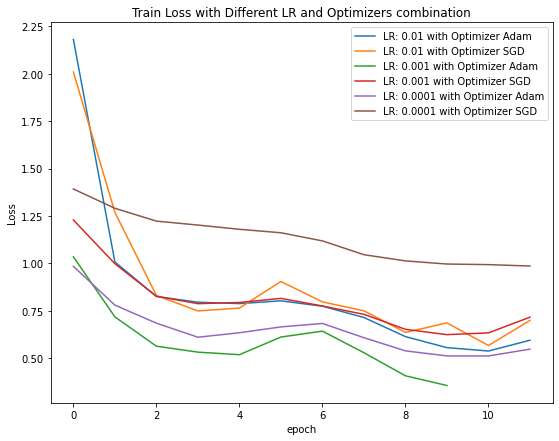

In [25]:
epochs = [i for i in range(num_epochs)]

plt.figure(figsize=(9,7))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Train Loss with Different LR and Optimizers combination')

for learning_rate in hyper_parameters["learning_rate"]:
   for optimizer in hyper_parameters["optimizers"]:

     plt.plot([i for i in range(len(train_loss_hyper_parameters[f'lr{learning_rate}{optimizer}']))], train_loss_hyper_parameters[f'lr{learning_rate}{optimizer}'],label=f'LR: {learning_rate} with Optimizer {optimizer}')
    
plt.legend()

**Plot Train Accuracy with Different LR and Optimizers combination**

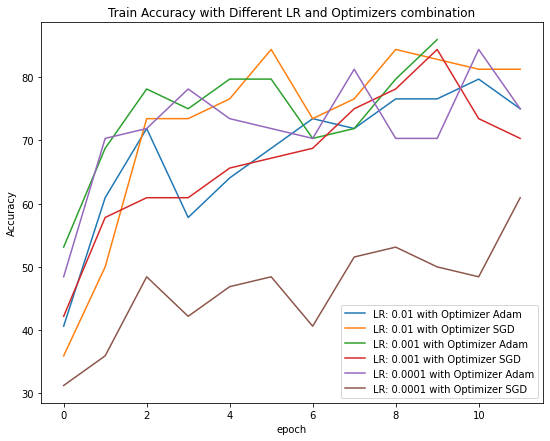

In [24]:
plt.figure(figsize=(9,7))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy with Different LR and Optimizers combination')

for learning_rate in hyper_parameters["learning_rate"]:
   for optimizer in hyper_parameters["optimizers"]:

     plt.plot([i for i in range(len(train_acc_hyper_parameters[f'lr{learning_rate}{optimizer}']))], train_acc_hyper_parameters[f'lr{learning_rate}{optimizer}'],label=f'LR: {learning_rate} with Optimizer {optimizer}')
    
plt.legend()

**Plot Validation Loss with Different LR and Optimizers combination**

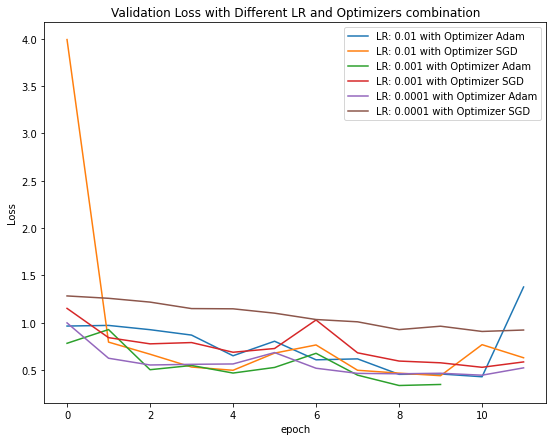

In [27]:
epochs = [i for i in range(num_epochs)]

plt.figure(figsize=(9,7))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Validation Loss with Different LR and Optimizers combination')

for learning_rate in hyper_parameters["learning_rate"]:
   for optimizer in hyper_parameters["optimizers"]:

     plt.plot([i for i in range(len(val_loss_hyper_parameters[f'lr{learning_rate}{optimizer}']))], val_loss_hyper_parameters[f'lr{learning_rate}{optimizer}'],label=f'LR: {learning_rate} with Optimizer {optimizer}')
    
plt.legend()

**Plot Validation Accuracy with Different LR and Optimizers combination**

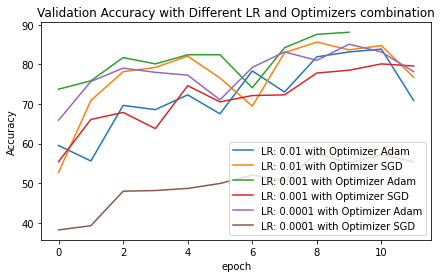

In [28]:
epochs = [i for i in range(num_epochs)]

plt.figure(figsize=(7,4))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy with Different LR and Optimizers combination')

for learning_rate in hyper_parameters["learning_rate"]:
   for optimizer in hyper_parameters["optimizers"]:

     plt.plot([i for i in range(len(val_acc_hyper_parameters[f'lr{learning_rate}{optimizer}']))], val_acc_hyper_parameters[f'lr{learning_rate}{optimizer}'],label=f'LR: {learning_rate} with Optimizer {optimizer}')
    
plt.legend()

## **Hyperparameter Tuning with Batch Size**

In [29]:
hyper_parameters = {"batch_size": [32, 64, 128]}

train_loss_hyper_parameters = {"b32": [], "b64": [], "b128": []}
train_acc_hyper_parameters = {"b32": [], "b64": [], "b128": []}
val_loss_hyper_parameters = {"b32": [], "b64": [], "b128": []}
val_acc_hyper_parameters = {"b32": [], "b64": [], "b128": []}

num_epochs=15
learning_rate = .0001

for batch_size in hyper_parameters["batch_size"]:

    print(f'Results of the batch size = {batch_size}')

    ############ Load the dataset ###########
    train_loader, test_loader, valid_loader, data = load_data(root_dir, test_split=0.2, val_split=0.1, batch_size=batch_size, input_size=[64,64])
    label_encoding = data.class_to_idx  
    print("label mapping is ", label_encoding, "\n") 

    ########### Load the Model ###########
    model = models.resnet50(pretrained=False) # By default, no pre-trained weights are used. 
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 4) #num_classes = 4
  
    ######### Loss, Early Stopping and Optimizer with LR Scheduler ###############
    criterion = nn.CrossEntropyLoss() 
    early_stopping = EarlyStopping(tolerance=3, min_delta=0.01)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0001)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 3, verbose=False)


    ############ Call the train function ###########
    model.to(device)
    minibatch_loss_list, train_acc_list, valid_acc_list, train_loss_list, valid_loss_list = train_model(model=model,
                                                  num_epochs=num_epochs,
                                                  train_loader=train_loader,
                                                  valid_loader=valid_loader,
                                                  criterion = criterion,
                                                  optimizer=optimizer,
                                                  device=device,
                                                  early_stopping=early_stopping,
                                                  file_name = file_name,
                                                  path_to_save_model=path_to_save_model,
                                                  scheduler=scheduler) 

    ############ Store train_loss, and train_accuracy in the defined dictionaries ###########
    train_loss_hyper_parameters[f'b{batch_size}'] = train_loss_list
    train_acc_hyper_parameters[f'b{batch_size}'] = train_acc_list

    val_loss_hyper_parameters[f'b{batch_size}'] = valid_loss_list
    val_acc_hyper_parameters[f'b{batch_size}'] = valid_acc_list

    test_acc, test_loss= compute_accuracy_and_loss(model, test_loader,criterion, device=device)
    print(f'Test Accuracy {test_acc :.2f}%')
    print(f'Test Loss {test_loss :.4f}')

    print("CONFUSION MATRIX")
    print(compute_classification_report(test_loader, model, device=device))

    print("-"*60, "\n\n")

Results of the batch size = 32
label mapping is  {'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3} 



/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 001/015 | Batch 0000/0124 | Loss: 1.4054
Epoch: 001/015 | Batch 0100/0124 | Loss: 0.8352
Epoch: 001/015 | Train ACC: 40.62% | Validation ACC: 68.03%| Train LOSS: 0.9500| Validation LOSS: 0.8373
Time elapsed: 0.31 min
Epoch: 002/015 | Batch 0000/0124 | Loss: 0.7301
Epoch: 002/015 | Batch 0100/0124 | Loss: 0.7554
Epoch: 002/015 | Train ACC: 70.31% | Validation ACC: 73.71%| Train LOSS: 0.7721| Validation LOSS: 0.6468
Time elapsed: 0.62 min
Epoch: 003/015 | Batch 0000/0124 | Loss: 0.9021
Epoch: 003/015 | Batch 0100/0124 | Loss: 0.6513
Epoch: 003/015 | Train ACC: 65.62% | Validation ACC: 78.86%| Train LOSS: 0.6614| Validation LOSS: 0.5249
Time elapsed: 0.93 min
Epoch: 004/015 | Batch 0000/0124 | Loss: 0.9318
Epoch: 004/015 | Batch 0100/0124 | Loss: 0.6849
Epoch: 004/015 | Train ACC: 68.75% | Validation ACC: 76.02%| Train LOSS: 0.6265| Validation LOSS: 0.5880
Time elapsed: 1.23 min
Epoch: 005/015 | Batch 0000/0124 | Loss: 0.5472
Epoch: 005/015 | Batch 0100/0124 | Loss: 0.4574
Epoch: 0

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 001/015 | Batch 0000/0062 | Loss: 1.3930
Epoch: 001/015 | Train ACC: 34.38% | Validation ACC: 63.77%| Train LOSS: 0.9919| Validation LOSS: 0.8820
Time elapsed: 0.29 min
Epoch: 002/015 | Batch 0000/0062 | Loss: 0.9741
Epoch: 002/015 | Train ACC: 64.06% | Validation ACC: 74.25%| Train LOSS: 0.7395| Validation LOSS: 0.6805
Time elapsed: 0.57 min
Epoch: 003/015 | Batch 0000/0062 | Loss: 0.6852
Epoch: 003/015 | Train ACC: 78.12% | Validation ACC: 76.91%| Train LOSS: 0.6296| Validation LOSS: 0.5756
Time elapsed: 0.85 min
Epoch: 004/015 | Batch 0000/0062 | Loss: 0.6320
Epoch: 004/015 | Train ACC: 71.88% | Validation ACC: 77.80%| Train LOSS: 0.6131| Validation LOSS: 0.5518
Time elapsed: 1.13 min
Epoch: 005/015 | Batch 0000/0062 | Loss: 0.6682
Epoch: 005/015 | Train ACC: 71.88% | Validation ACC: 76.91%| Train LOSS: 0.6151| Validation LOSS: 0.6025
Time elapsed: 1.40 min
Epoch: 006/015 | Batch 0000/0062 | Loss: 0.5487
Epoch: 006/015 | Train ACC: 73.44% | Validation ACC: 76.02%| Train LOSS:

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 001/015 | Batch 0000/0031 | Loss: 1.6363
Epoch: 001/015 | Train ACC: 14.84% | Validation ACC: 40.67%| Train LOSS: 1.0018| Validation LOSS: 1.4938
Time elapsed: 0.28 min
Epoch: 002/015 | Batch 0000/0031 | Loss: 0.6494
Epoch: 002/015 | Train ACC: 72.66% | Validation ACC: 73.89%| Train LOSS: 0.7156| Validation LOSS: 0.6630
Time elapsed: 0.57 min
Epoch: 003/015 | Batch 0000/0031 | Loss: 0.6600
Epoch: 003/015 | Train ACC: 71.09% | Validation ACC: 77.98%| Train LOSS: 0.6319| Validation LOSS: 0.5586
Time elapsed: 0.84 min
Epoch: 004/015 | Batch 0000/0031 | Loss: 0.6503
Epoch: 004/015 | Train ACC: 71.09% | Validation ACC: 77.62%| Train LOSS: 0.6267| Validation LOSS: 0.5692
Time elapsed: 1.10 min
Epoch: 005/015 | Batch 0000/0031 | Loss: 0.6296
Epoch: 005/015 | Train ACC: 74.22% | Validation ACC: 81.53%| Train LOSS: 0.5998| Validation LOSS: 0.5295
Time elapsed: 1.36 min
Epoch: 006/015 | Batch 0000/0031 | Loss: 0.7902
Epoch: 006/015 | Train ACC: 68.75% | Validation ACC: 80.11%| Train LOSS:

**Training Loss for Differet Batch Size**

<Figure size 720x720 with 0 Axes>

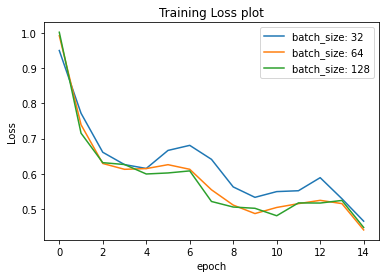

In [37]:
####### plot the the training loss here #########
epochs = [i for i in range(num_epochs)]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Training Loss plot')

for batch_size in hyper_parameters["batch_size"]:
    plt.plot(epochs,train_loss_hyper_parameters[f'b{batch_size}'],label=f'batch_size: {batch_size}')
    
plt.legend()

**Training Accuracy for Different Batch Size**

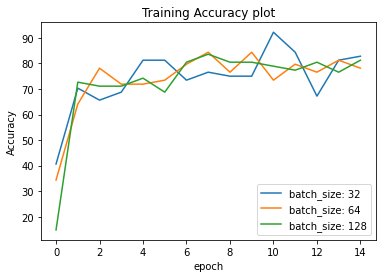

In [31]:
####### plot the the training accuracies here #########
epochs = [i for i in range(num_epochs)]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy plot')

for batch_size in hyper_parameters["batch_size"]:
    plt.plot(epochs,train_acc_hyper_parameters[f'b{batch_size}'],label=f'batch_size: {batch_size}')
    
plt.legend()

**Validation Loss for Differet Batch Size**

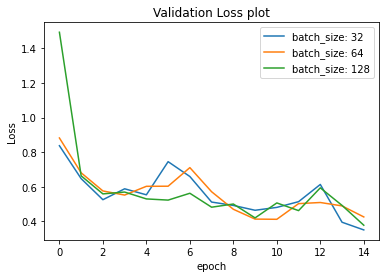

In [32]:
####### plot the the Validation loss here #########
epochs = [i for i in range(num_epochs)]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Validation Loss plot')

for batch_size in hyper_parameters["batch_size"]:
    plt.plot(epochs , val_loss_hyper_parameters[f'b{batch_size}'],label=f'batch_size: {batch_size}')
    
plt.legend()

**Validation Accuracy for Different Batch Size**

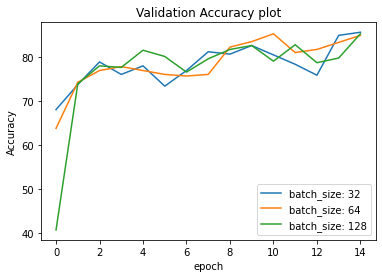

In [33]:
####### plot the the Validation accuracies here #########
epochs = [i for i in range(num_epochs)]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy plot')

for batch_size in hyper_parameters["batch_size"]:
    plt.plot(epochs,val_acc_hyper_parameters[f'b{batch_size}'],label=f'batch_size: {batch_size}')
    
plt.legend()